In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# file path to the csv file
csv_file = "./weights.csv"

# Read csv file into dataframe
df = pd.read_csv(csv_file, names = ["Date","Weight","Weight Units", "Body Fat", "Body Fat Units", "Source"],
                                    parse_dates= ["Date"])

# sort data by date
df = df.sort_values("Date", ascending = True)


# Preview first few rows in the dataframe
df.head()

,Date,Weight,Weight Units,Body Fat,Body Fat Units,Source
0,2010-03-24,167.8,lbs,15.0,%,withings
1,2010-03-26,166.4,lbs,16.5,%,withings
2,2010-03-30,168.0,lbs,16.9,%,withings
3,2010-04-06,170.2,lbs,16.9,%,withings
4,2010-04-14,164.9,lbs,NaN,NaN,withings


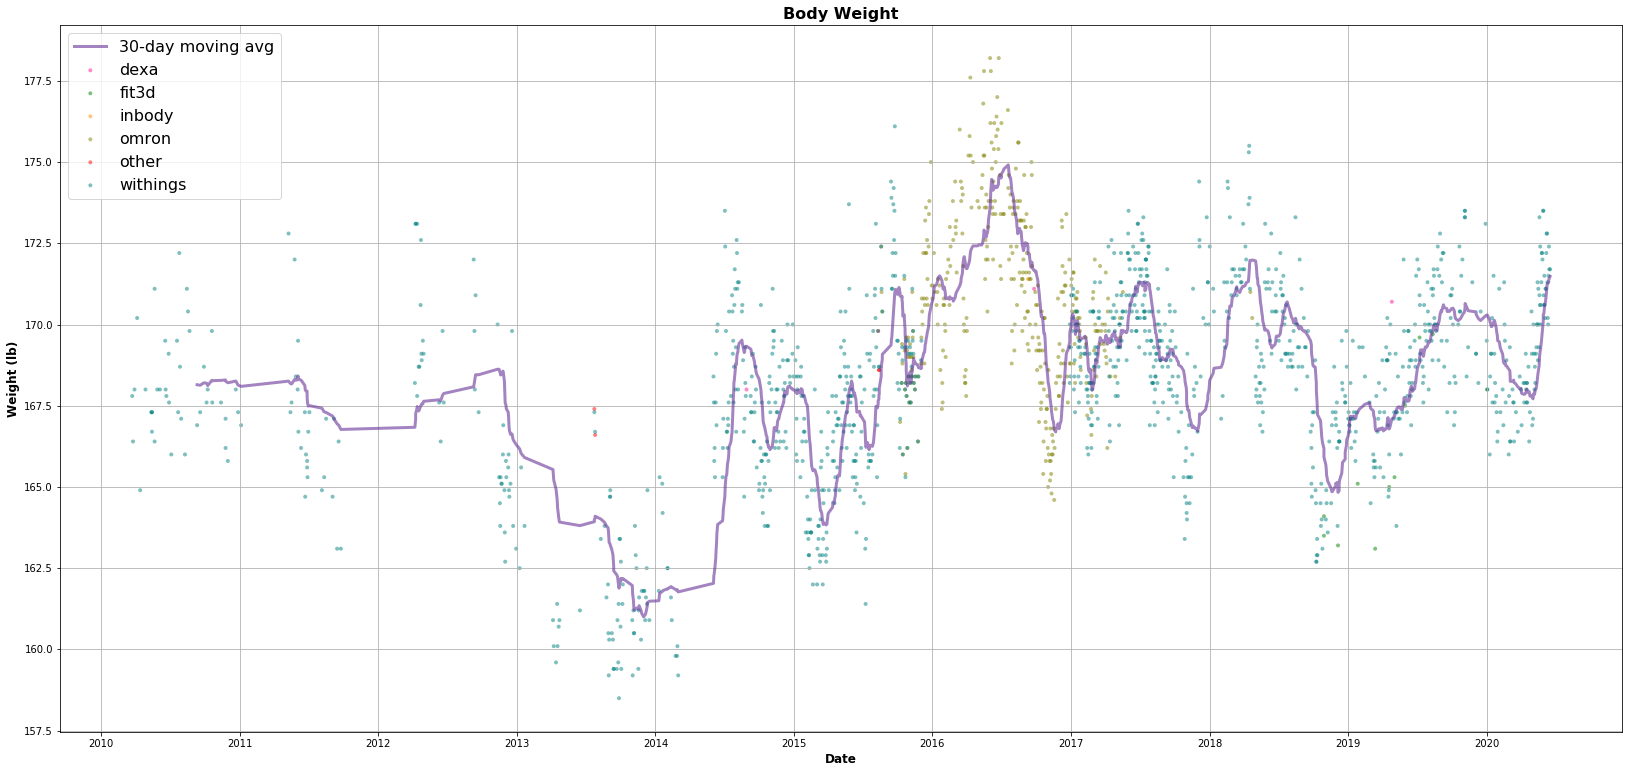

In [5]:
# create weights chart
fig, ax = plt.subplots()
ax.margins(0.05) # optional, adds 5% padding to autoscaling

# plot weight data
colors=["deeppink", "green", "darkorange", "olive", "red", "teal"]
i=0
for key, grp in df.groupby(['Source']):
    ax.scatter(grp['Date'], grp['Weight'], s=16, label=key, alpha=0.5, edgecolors='none', color=colors[i])
    i = i + 1

# moving average trendline
df["Weight"].fillna( method ='ffill', inplace = True)
rolling_mean = df["Weight"].rolling(window=30).mean()
ax.plot(df["Date"], rolling_mean, label='30-day moving avg', color='rebeccapurple', alpha=0.6, linewidth=3)

# title and axes
# plt.subplots_adjust(top=0.85)
plt.title('Body Weight', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Weight (lb)', fontsize=12, fontweight='bold')
# display x-axis ticks for every year using YYYY format
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# legend and grid lines
ax.legend(loc='upper left', fontsize=16)
ax.grid(True)

# resize chart
plt.rcParams['figure.figsize'] = (18.0, 16.0)
# plt.rcParams['figure.figsize'] = (28.0, 13.0)

# save image
plt.savefig('chart-weights.png', bbox_inches='tight')




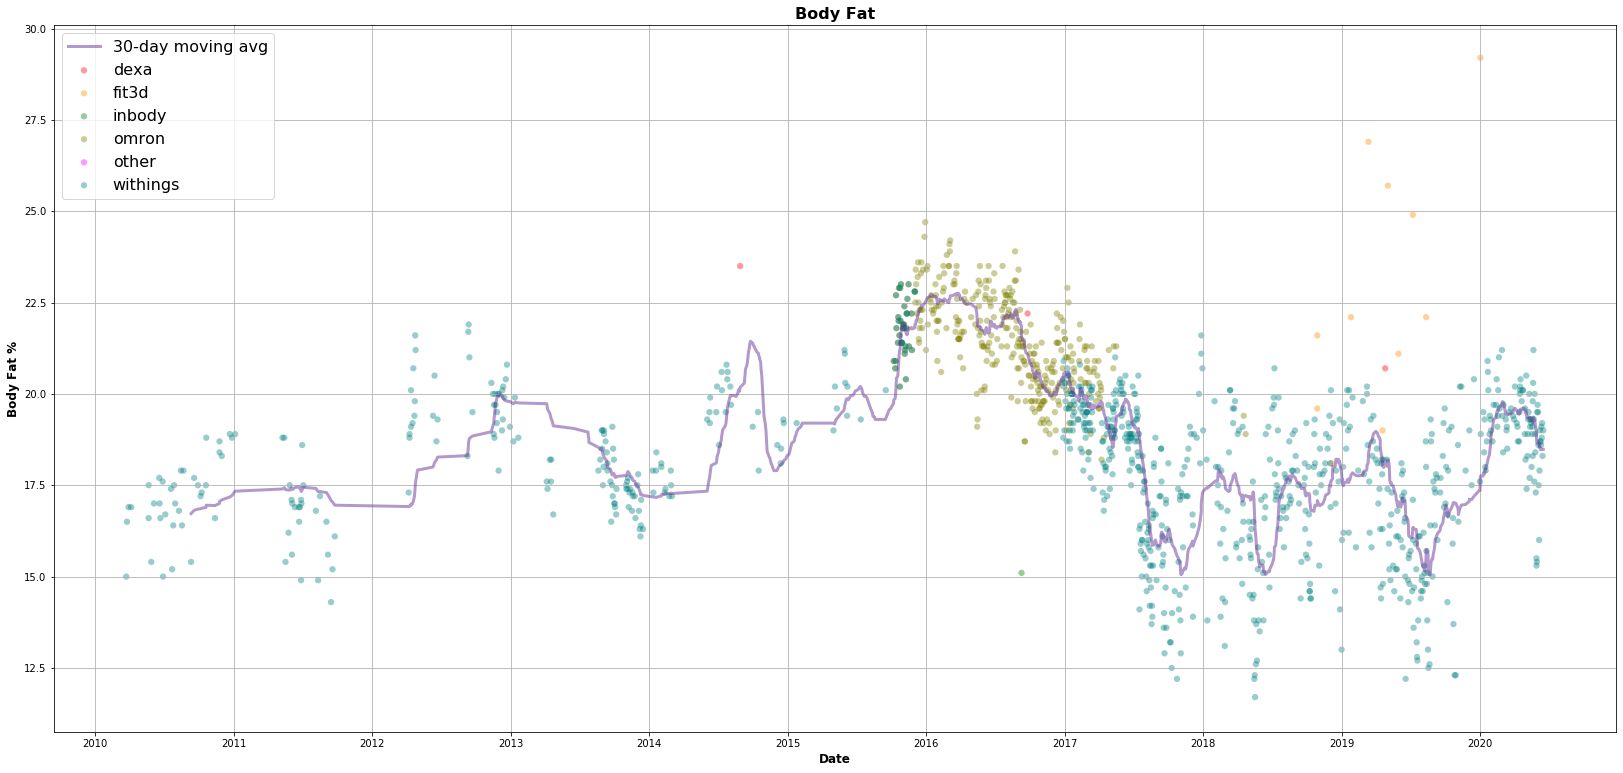

In [6]:
# create body fat chart
fig, ax = plt.subplots()
ax.margins(0.05) # optional, adds 5% padding to autoscaling

# plot body fat data
colors=["red", "darkorange", "green", "olive", "magenta", "teal"]

i=0
for key, grp in df.groupby(['Source']):
    ax.scatter(grp['Date'], grp['Body Fat'], s=40, label=key, alpha=0.4, edgecolors='none', color=colors[i])
    i = i + 1

# moving average trendline
df["Body Fat"].fillna( method ='ffill', inplace = True)
rolling_mean = df["Body Fat"].rolling(window=30).mean()
ax.plot(df["Date"], rolling_mean, label='30-day moving avg', color='rebeccapurple', alpha=0.5, linewidth=3)

# title and axes
plt.title('Body Fat', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Body Fat %', fontsize=12, fontweight='bold')

# display x-axis ticks for every year using YYYY format
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# legend and grid lines
ax.legend(loc='upper left', fontsize=16)
ax.grid(True)

# resize chart
plt.rcParams['figure.figsize'] = (18.0, 16.0)
# plt.rcParams['figure.figsize'] = (28.0, 13.0)

# save image
plt.savefig('chart-bodyfats.png', bbox_inches='tight')